<a href="https://colab.research.google.com/github/kuball1000/machine_learning/blob/main/regresja_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

In [8]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [12]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [13]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

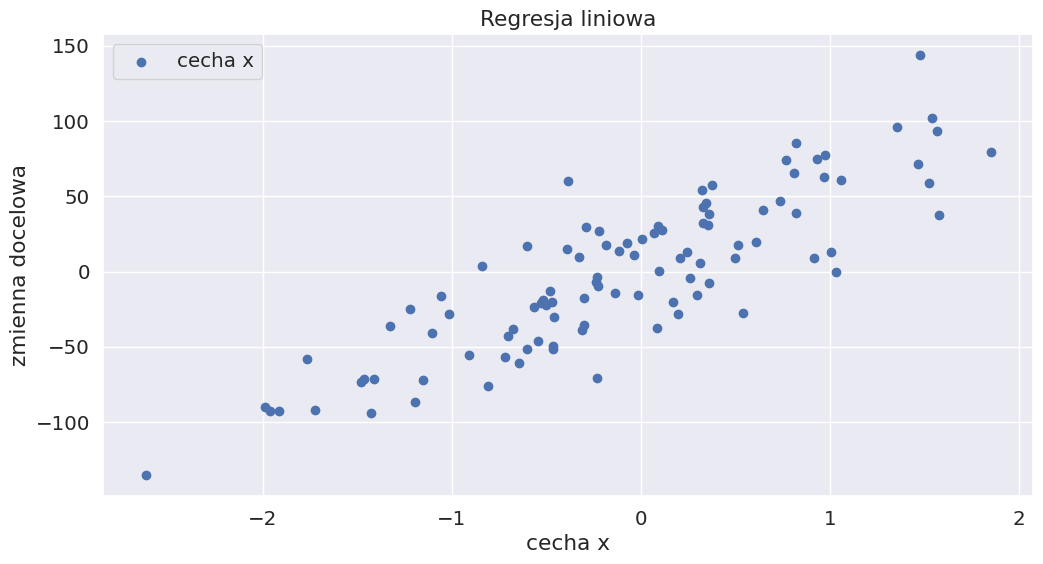

In [20]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(data, target) #metoda fit dopasowuje model liniowy do danych
regressor.score(data, target) #ta metoda ocenia jak dobrze jest dopasowany model na przekazanych dancyh (R2 score)

0.7426670084336404

In [25]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

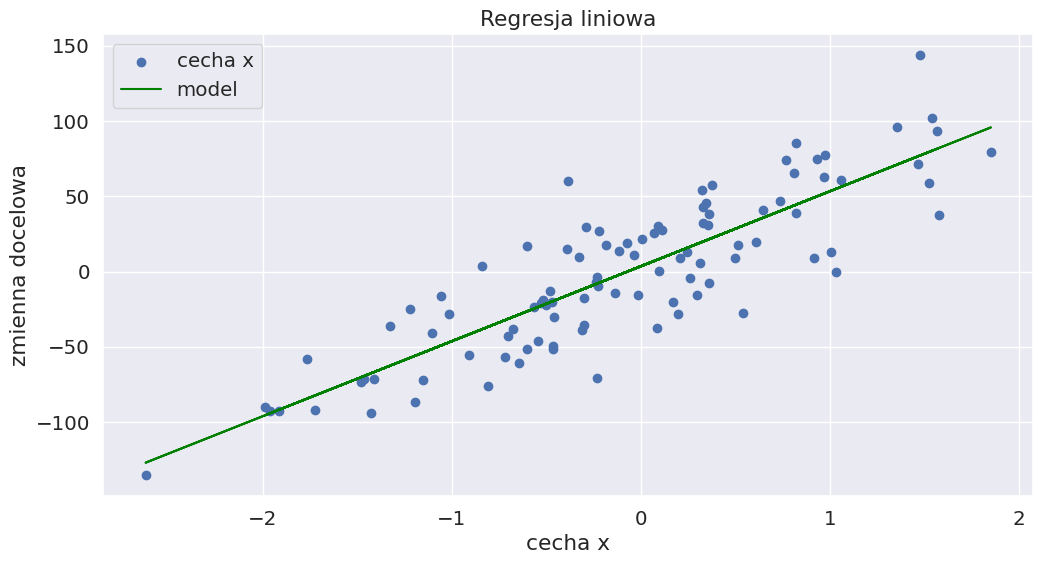

In [28]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='green', label='model')
plt.legend()
plt.show()

In [30]:
#R2 score: 1-(u/v)
#u = ((y_true - y_pred) ** 2).sum()
#v = ((y_true - y_true.mean()) ** 2).sum()
#R2 score = 1-(u/v)

In [31]:
regressor.score(data, target)

0.7426670084336404

In [33]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [37]:
# Y = W0 + W1X1
print(regressor.coef_) #W1
print(regressor.intercept_) #W0

[49.83]
3.4953459615809184


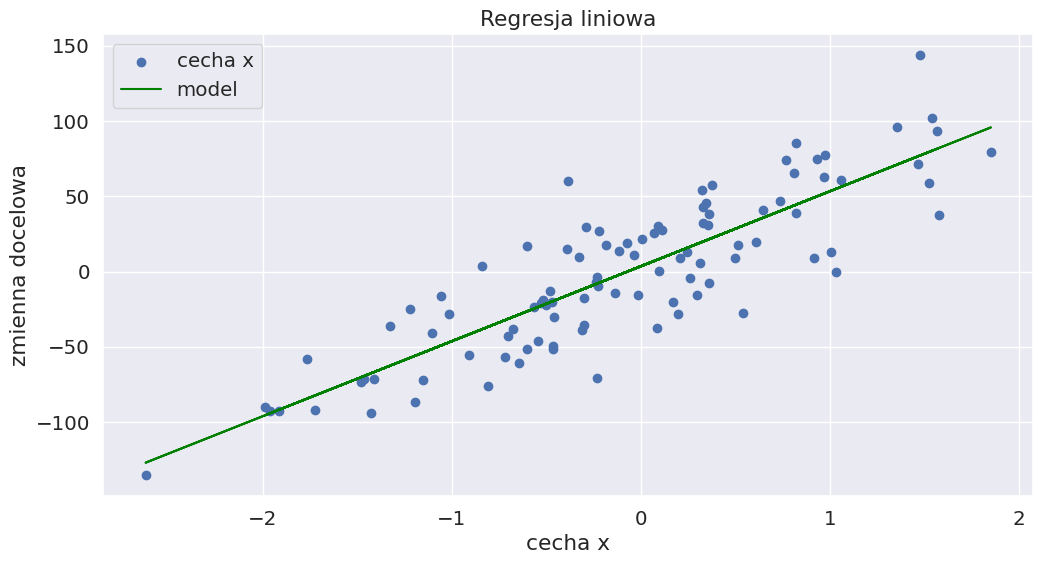

In [38]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, (regressor.intercept_ + regressor.coef_[0] * data), color='green', label='model')
plt.legend()
plt.show()

# ZBIORY TRENINOWE I TESTOWE

In [39]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


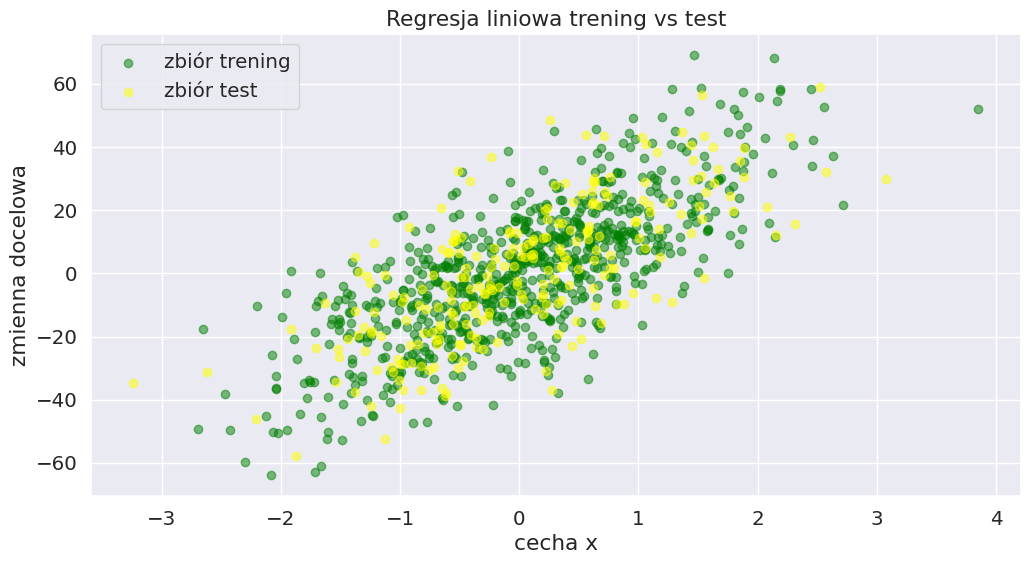

In [42]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa trening vs test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór trening', color='green', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór test', color='yellow', alpha=0.5)
plt.legend()
plt.show()

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.5550440098049001

In [44]:
regressor.score(X_test, y_test)

0.5108438585354155

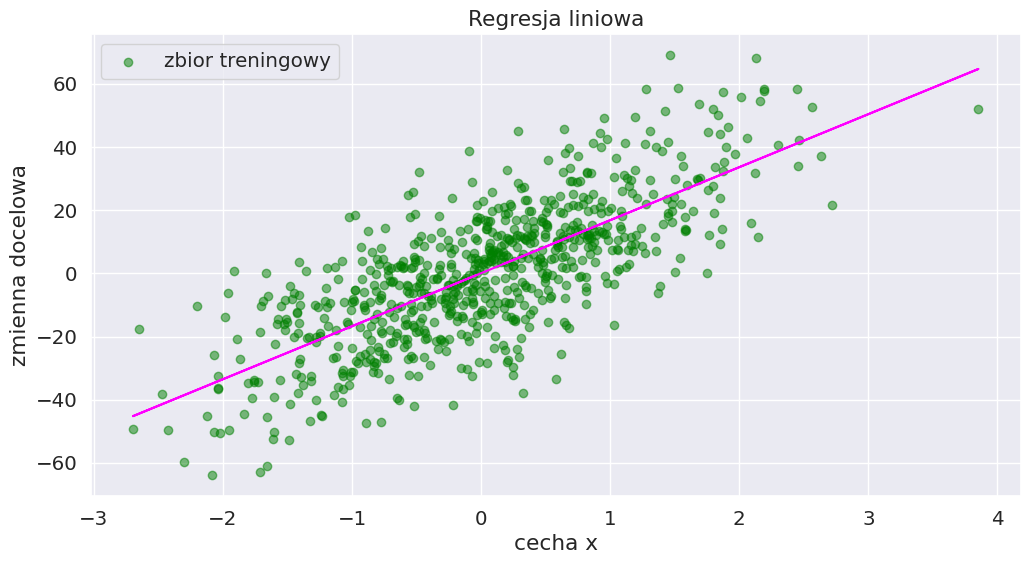

In [45]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbior treningowy', color='green', alpha=0.5)
plt.plot(X_train, (regressor.intercept_ + regressor.coef_[0] * X_train), color='magenta')
plt.legend()
plt.show()

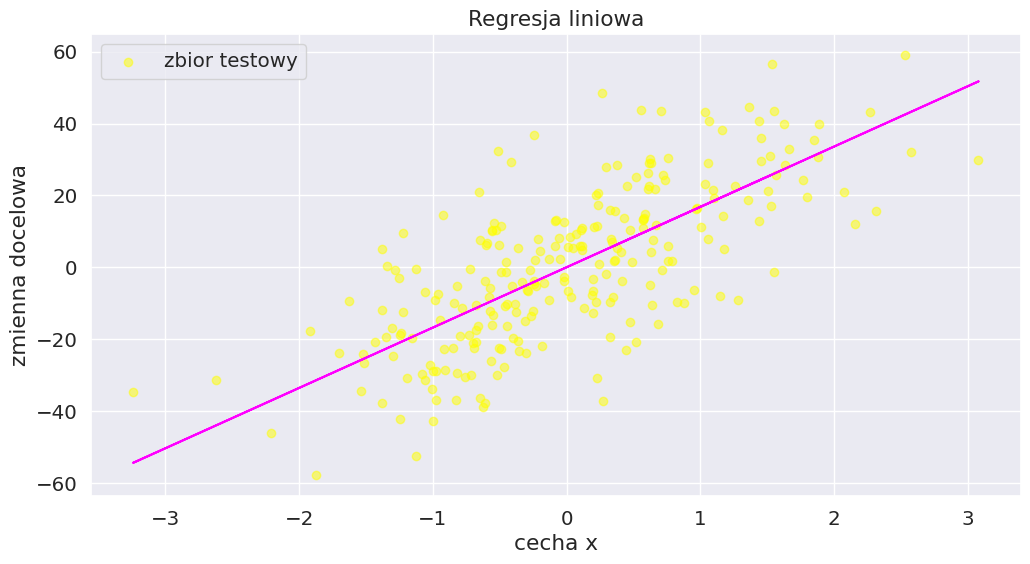

In [47]:
plt.figure(figsize=(12,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbior testowy', color='yellow', alpha=0.5)
plt.plot(X_test, (regressor.intercept_ + regressor.coef_[0] * X_test), color='magenta')
plt.legend()
plt.show()

In [51]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


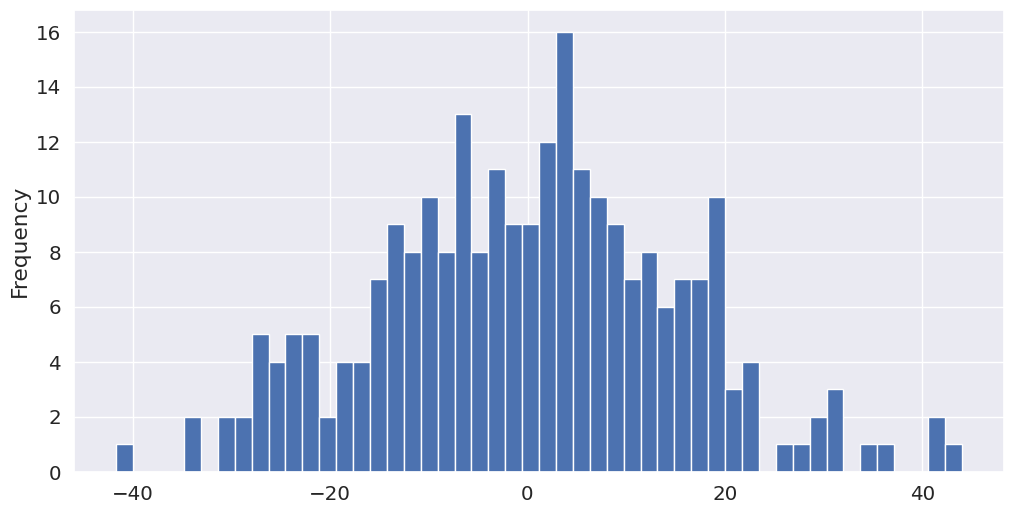

In [52]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(12,6))